# Retail Data Set

# Business Understanding

The dataset consists of transactional data with customers in different countries who make purchases from an online retail company based in the United Kingdom (UK) that sells unique all-occasion gifts. 

Company — UK-based and registered non-store online retail
Products for selling — Mainly all-occasion gifts
Customers — Most are wholesalers (local or international)
Transactions Period — 1st Dec 2010–9th Dec 2011 (One year)


## Features 

InvoiceNo (invoice_num): A number assigned to each transaction


StockCode (stock_code): Product code


Description (description): Product name


Quantity (quantity): Number of products purchased for each transaction


InvoiceDate (invoice_date): Timestamp for each transaction


UnitPrice (unit_price): Product price per unit


CustomerID (cust_id): Unique identifier each customer


Country (country): Country name

In [0]:
#importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


#### 1) Loading Dataset

In [0]:
data = pd.read_csv("OnlineRetail.csv")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
#shape statistics and data types of data
print(data.shape,'\n')
print(data.info())
print(data.describe())

(541909, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


from above statistics we found Quantity and unit price has negative value also

In [7]:
#checking for null value
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#checking % of null values in each columns
round((data.isnull().sum())*100/len(data), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [0]:
#droping null values from data set
data.dropna(axis='rows',subset=["Description","CustomerID"],inplace=True)
data.reset_index(drop=True,inplace=True)

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [0]:
#removing negative value from Quantity
data=data[data.Quantity>0]

In [12]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [0]:
#Doing feature Engineering 
data['Description'] = data.Description.str.lower()
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [0]:
data["Total_amount_spend"] = data["Quantity"]*data["UnitPrice"]

In [0]:
data['year_month'] = data['InvoiceDate'].map(lambda x: 100*x.year + x.month)
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['day'] = data.InvoiceDate.dt.dayofweek+1
data['hours'] = data.InvoiceDate.dt.hour

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount_spend,year_month,month,year,day,hours
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012,12,2010,3,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,12,2010,3,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012,12,2010,3,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,12,2010,3,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,12,2010,3,8


In [0]:
#rearange columns 
data=data[['InvoiceNo','InvoiceDate','year_month','month','day','hours','StockCode','Description','Quantity',
                 'UnitPrice',"Total_amount_spend",'CustomerID','Country']]

In [18]:
data.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hours,StockCode,Description,Quantity,UnitPrice,Total_amount_spend,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


# Exploratory Data Analysis

In [19]:
data["Description"].value_counts()

white hanging heart t-light holder    2028
regency cakestand 3 tier              1724
jumbo bag red retrospot               1618
assorted colour bird ornament         1408
party bunting                         1397
                                      ... 
orange felt vase + flowers               1
orange/wht/fuschia stones necklace       1
peg bag apple design                     1
happy birthday card teddy/cake           1
zinc star t-light holder                 1
Name: Description, Length: 3877, dtype: int64

In [20]:
data["Country"].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### Top 5 customers with most number of orders

In [21]:
data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False).head(5)

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


#### Top 5 customers with highest money spend

In [22]:
cust=data.groupby(by=["CustomerID","Country"],as_index=False)['Total_amount_spend'].sum()
cust.sort_values(by = "Total_amount_spend", ascending = False).head()

,CustomerID,Country,Total_amount_spend
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


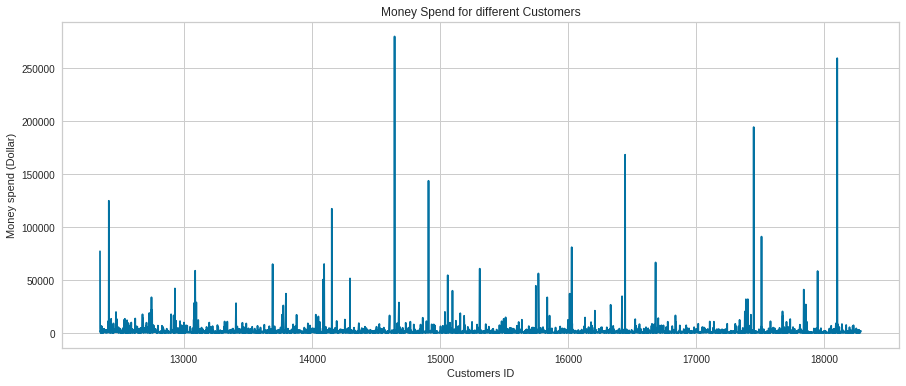

In [23]:
plt.subplots(figsize=(15,6))
plt.plot(cust.CustomerID,cust.Total_amount_spend )
plt.xlabel('Customers ID')
plt.ylabel('Money spend (Dollar)')
plt.title('Money Spend for different Customers')
plt.show()

In [24]:
data["month"].value_counts()

11    64545
10    49557
12    43464
9     40030
5     28322
6     27185
3     27177
8     27013
7     26827
4     22644
1     21232
2     19928
Name: month, dtype: int64

In [25]:
data.year_month.unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112])

This mean that transaction is between 2010 12 to 2011 11

In [0]:
numOfOrderPerMonth = data.groupby("year_month")['InvoiceNo'].count().sort_values(ascending=False)

In [27]:
numOfOrderPerMonth

year_month
201111    64545
201110    49557
201109    40030
201105    28322
201106    27185
201103    27177
201108    27013
201107    26827
201012    26160
201104    22644
201101    21232
201102    19928
201112    17304
Name: InvoiceNo, dtype: int64

**Orders per month**

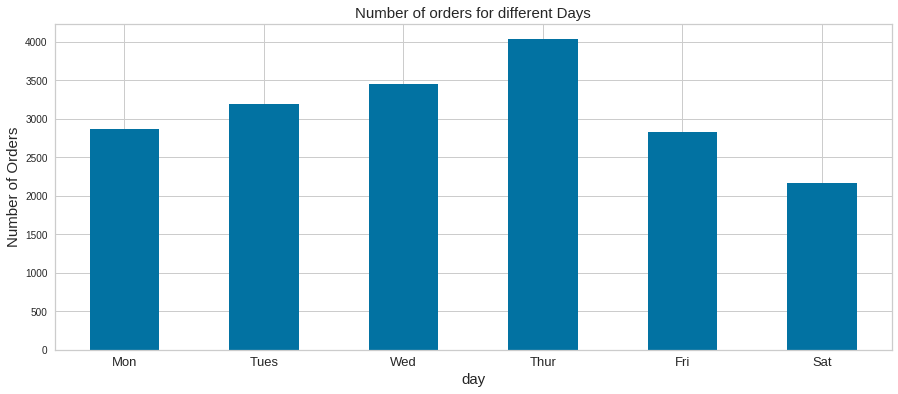

In [28]:
ax = data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tues','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=13)
plt.show()

**Orders per Month**

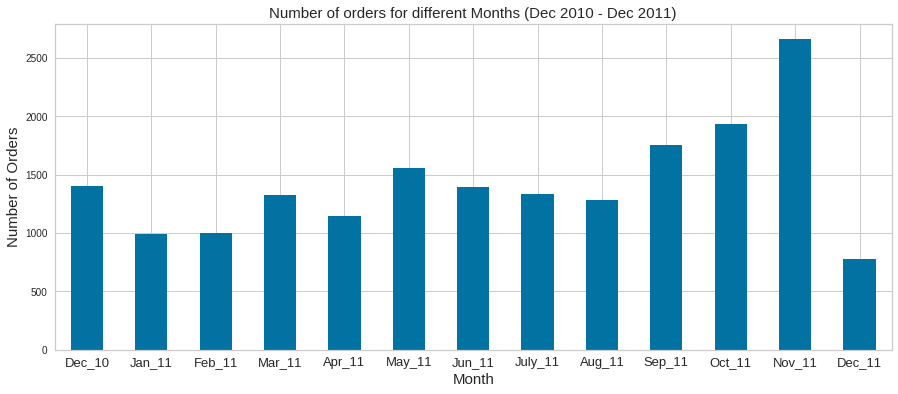

In [29]:
ax = data.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

**Orders per hour**

In [30]:
data['hours'].value_counts()

12    72069
13    64031
14    54127
11    49092
15    45372
10    37999
16    24093
9     21945
17    13072
8      8691
19     3322
18     2929
20      802
7       379
6         1
Name: hours, dtype: int64

**Order in Hours**

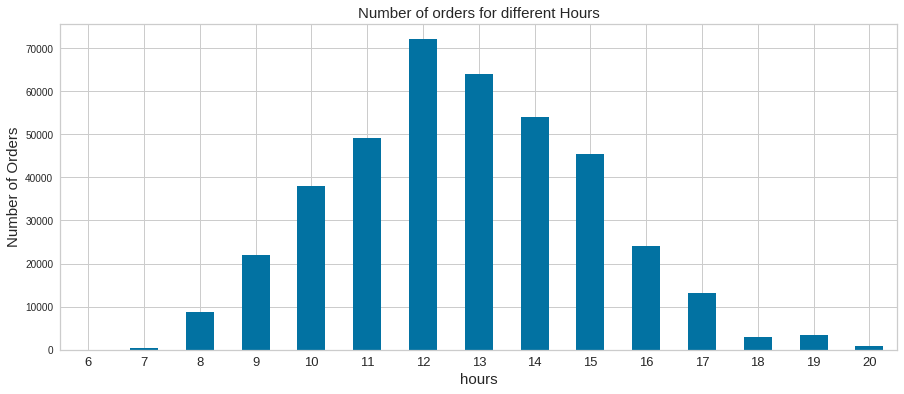

In [31]:
ax = data.groupby('hours')['InvoiceNo'].count().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('hours',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(('6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'), rotation='horizontal', fontsize=13)
plt.show()

In [32]:
data.columns

Index(['InvoiceNo', 'InvoiceDate', 'year_month', 'month', 'day', 'hours',
       'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Total_amount_spend', 'CustomerID', 'Country'],
      dtype='object')

In [33]:
data.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [34]:
data.Total_amount_spend.describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Total_amount_spend, dtype: float64

**Checking For outliear of Numerical Data**


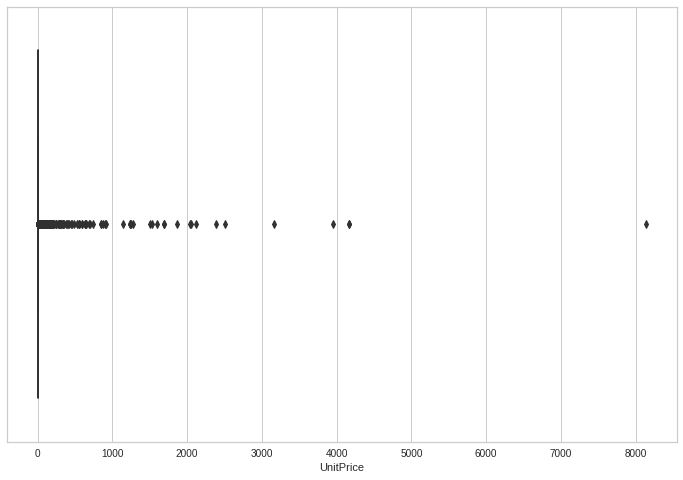

In [35]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=data ,x="UnitPrice")

In [36]:
data.Total_amount_spend.value_counts()

15.00      20082
17.70       9174
16.50       8490
10.20       8028
19.80       7625
           ...  
65.88          1
159.50         1
436.80         1
1275.00        1
321.84         1
Name: Total_amount_spend, Length: 2940, dtype: int64

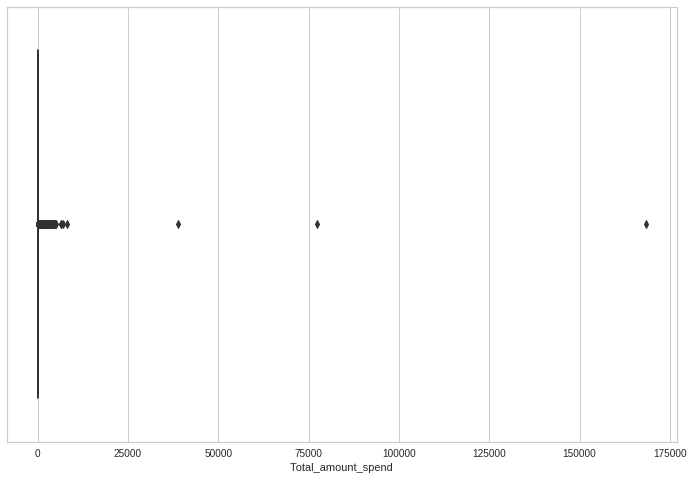

In [37]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=data ,x="Total_amount_spend")

No handles with labels found to put in legend.


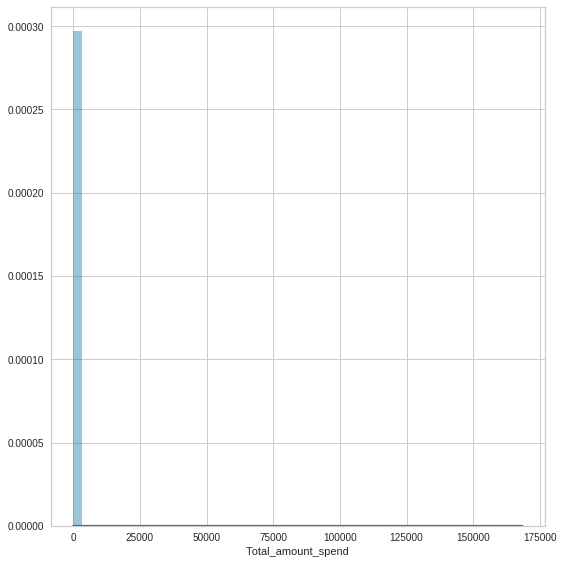

In [38]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.distplot(data["Total_amount_spend"])
plt.tight_layout()
plt.legend()

**Data Preparation for clustering**

In [39]:
data.groupby(["CustomerID","Country"]).Total_amount_spend.agg(['sum','mean','max','min']).head(10)

,,sum,mean,max,min
CustomerID,Country,,,,
12346.0,United Kingdom,77183.60,77183.600000,77183.60,77183.60
12347.0,Iceland,4310.00,23.681319,249.60,5.04
12348.0,Finland,1797.24,57.975484,240.00,13.20
12349.0,Italy,1757.55,24.076027,300.00,6.64
12350.0,Norway,334.40,19.670588,40.00,8.50
12352.0,Norway,2506.04,29.482824,376.50,9.90
12353.0,Bahrain,89.00,22.250000,39.80,11.60
12354.0,Spain,1079.40,18.610345,54.08,8.50
12355.0,Bahrain,459.40,35.338462,120.00,17.70


In [40]:
data.groupby(["CustomerID","Country"]).agg(['sum','mean','max','min']).head(10)

year_month                 ... Total_amount_spend          
                                 sum           mean  ...                max       min
CustomerID Country                                   ...                             
12346.0    United Kingdom     201101  201101.000000  ...           77183.60  77183.60
12347.0    Iceland          36598483  201090.565934  ...             249.60      5.04
12348.0    Finland           6232657  201053.451613  ...             240.00     13.20
12349.0    Italy            14681103  201111.000000  ...             300.00      6.64
12350.0    Norway            3418734  201102.000000  ...              40.00      8.50
12352.0    Norway           17094052  201106.494118  ...             376.50      9.90
12353.0    Bahrain            804420  201105.000000  ...              39.80     11.60
12354.0    Spain            11664032  201104.000000  ...              54.08      8.50
12355.0    Bahrain           2614365  201105.000000  ...             120.00     17.70
12356.0    Portugal         11865042  201102.406780  ...             324.00      3.75

[10 rows x 28 columns]

We are going to analyse the Customers based on below 3 factors: <br>
R (Recency): Number of days since last purchase<br>
F (Frequency): Number of tracsactions<br>
M (Monetary): Total amount of transactions (revenue contributed)<br>

In [41]:
#For Monetory 
monetory = data.groupby("CustomerID").Total_amount_spend.sum()
monetory = monetory.reset_index()
monetory.columns = ["CustomerID","Monetory"]
monetory.head(10)

,CustomerID,Monetory
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,2506.04
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


In [0]:
#For Recency
# Compute the maximum date to know the last transaction date
# Compute the difference between max date and transaction date
data['DateDifference'] = data['InvoiceDate'].max() - data["InvoiceDate"]

In [43]:
data.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hours,StockCode,Description,Quantity,UnitPrice,Total_amount_spend,CustomerID,Country,DateDifference
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom,373 days 04:24:00
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,373 days 04:24:00
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,373 days 04:24:00
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom,373 days 04:24:00
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom,373 days 04:24:00


In [44]:
#For Recency 
recency = data.groupby('CustomerID')['DateDifference'].min()
recency = recency.reset_index()
recency['DateDifference'] =  recency['DateDifference'].dt.days
recency.head(10)

,CustomerID,DateDifference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


In [45]:
#For Frequency
Frequency = data.groupby("CustomerID").InvoiceNo.count()
Frequency = Frequency.reset_index()
Frequency.columns = ["CustomerID","Frequency"]
Frequency.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


In [46]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(pd.merge(monetory,Frequency,on='CustomerID'),recency,on='CustomerID')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


**OutLiers Analysis and removal**

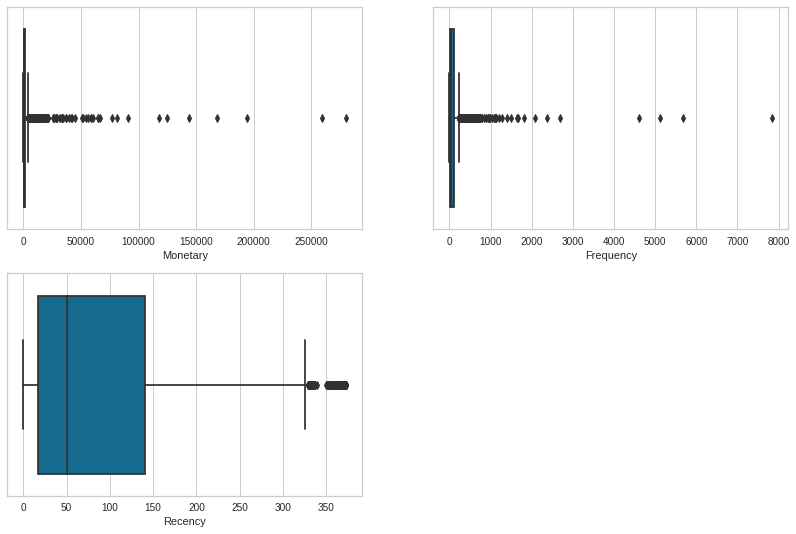

In [47]:
attributes = ['Monetary','Frequency','Recency']
fig = plt.figure(figsize = (14,9))
axes = 220
for att in attributes:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = rfm, x = att)
plt.show()

No handles with labels found to put in legend.


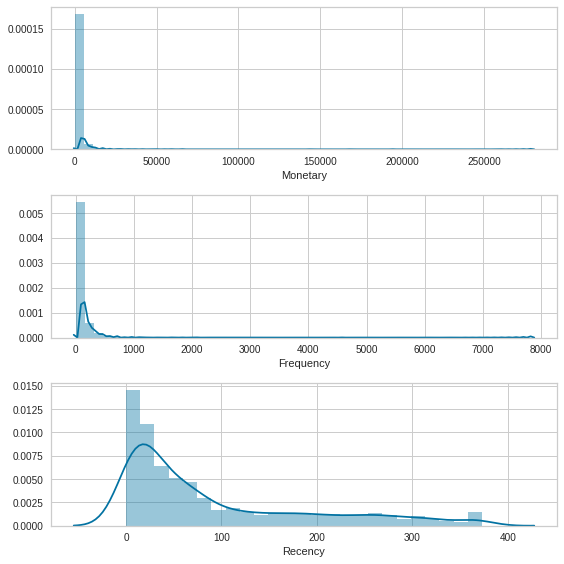

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(rfm["Monetary"], ax=ax1)
sns.distplot(rfm["Frequency"], ax=ax2)
sns.distplot(rfm["Recency"], ax=ax3)
plt.tight_layout()
plt.legend()

Positive Skewness show that mean and medain are greater then mode


No handles with labels found to put in legend.


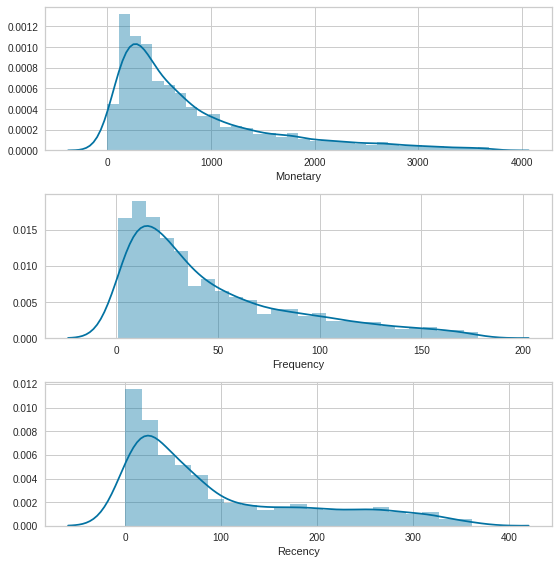

In [49]:
# Removing outliers for Total_amount_spend
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing  outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

#ploting after emoval of outliers
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(rfm["Monetary"], ax=ax1)
sns.distplot(rfm["Frequency"], ax=ax2)
sns.distplot(rfm["Recency"], ax=ax3)
plt.tight_layout()
plt.legend()

In [50]:
rfm.head()

,CustomerID,Monetary,Frequency,Recency
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35
6,12353.0,89.00,4,203


In [51]:
rfm.tail()

,CustomerID,Monetary,Frequency,Recency
4333,18278.0,173.90,9,73
4334,18280.0,180.60,10,277
4335,18281.0,80.82,7,180
4336,18282.0,178.05,12,7
4338,18287.0,1837.28,70,42


**Normalizing Data**

In [52]:
rfm_scaled = rfm[['Monetary','Frequency','Recency']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)
rfm_scaled.shape

(3587, 3)

**Model Building**

**K Mean CLustering find optimal K**

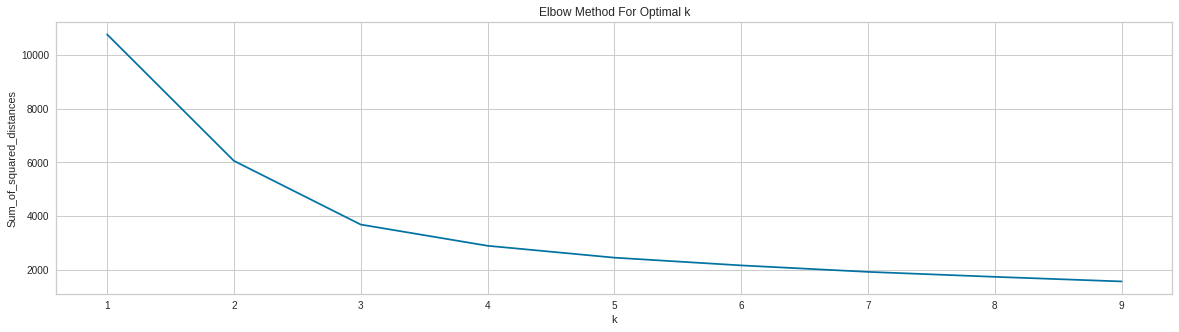

In [53]:
# USing Elbow method to find out the suitable number of clusters
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e873faac8>,
                 k=None, metric=None, model=None, timings=True)

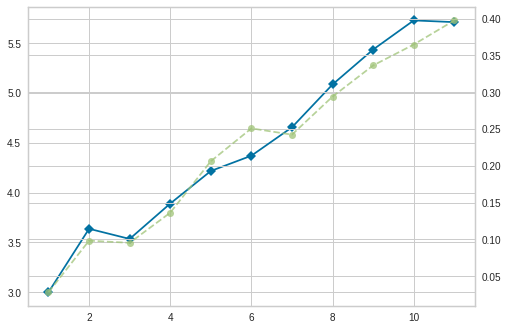

In [54]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(rfm_scaled)        # Fit the data to the visualizer


**1) KMean Clustering**

K-Means


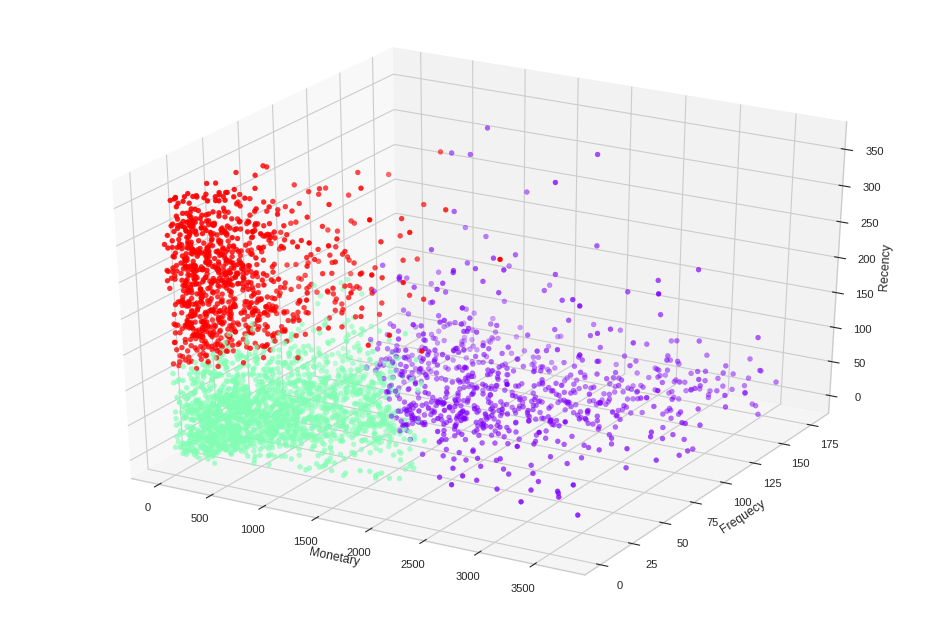

In [55]:
model = KMeans(n_clusters=3)
model.fit(rfm_scaled)
kmean_labels  = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=kmean_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("K-Means")

In [56]:
rfm_cluster = rfm.assign(Cluster=kmean_labels)
grouped_kmean = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_kmean

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15207.457,1889.863,108.124,44.848
1,15323.569,577.409,33.436,50.356
2,15334.004,374.317,21.610,239.996


CLuster 0 shows that high Total amount spend , higher transactions , and lower last purchase means cluster zero purchased every day </br>
CLuster 1 shows that lower Total amount spend , lower transactions , and higher last purchase means cluster one purchased once in the year </br>
CLuster 2 shows that medium Total amount spend , medium transactions , and medium last purchase means cluster two purchased once in the month </br>





**mini batch Kmean**

Mini Batch K-Means


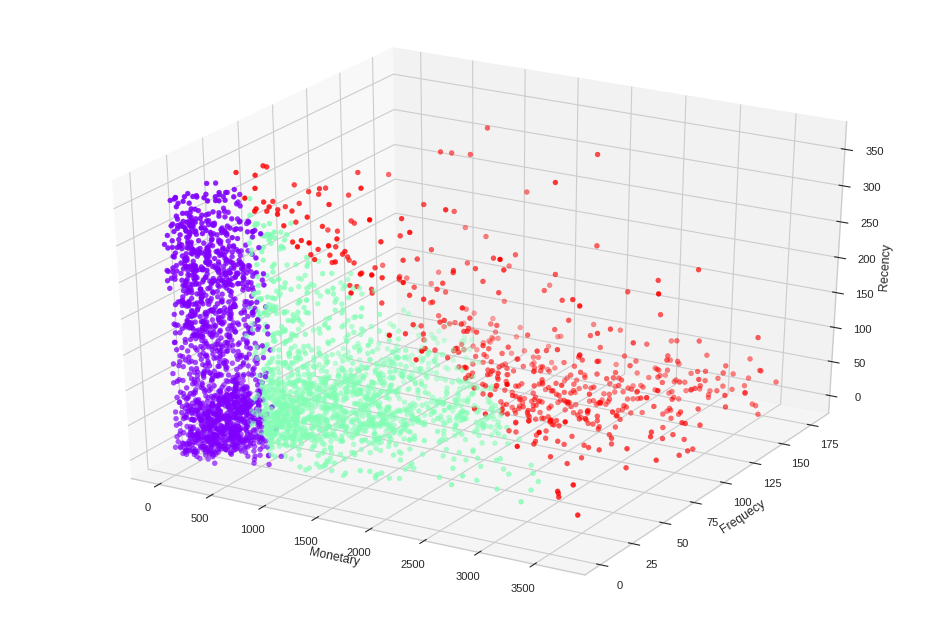

In [57]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
  

batch_size = 32
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, 
                      verbose = 0) 
  
mbk.fit(rfm_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(rfm_scaled, mbk_means_cluster_centers) 
  
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Mini Batch K-Means")

In [58]:
rfm_cluster = rfm.assign(Cluster=kmean_labels)
grouped_kmean = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_kmean

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15207.457,1889.863,108.124,44.848
1,15323.569,577.409,33.436,50.356
2,15334.004,374.317,21.610,239.996


CLuster 0 shows that high Total amount spend , higher transactions , and lower last purchase means cluster zero purchased every day </br>
CLuster 1 shows that lower Total amount spend , lower transactions , and higher last purchase means cluster one purchased once in the year </br>
CLuster 2 shows that medium Total amount spend , medium transactions , and medium last purchase means cluster two purchased once in the month </br>





**2) Mean Shift ALgorithum**

Finding best bandwith parameter value 

In [59]:
#checking for bandwidth
list = [0.1,0.2,0.3,0.4,0.5]

for i in list:
        band = estimate_bandwidth(rfm_scaled, quantile=i)
        analyzer = MeanShift(bandwidth=band)
        analyzer.fit_predict(rfm_scaled)
        labels = analyzer.labels_
        labels_unique = np.unique(labels)
        n_clusters_ = len(labels_unique)
        print(i)
        print("number of estimated clusters:",n_clusters_)
        print("bandwidth:",band)

0.1
number of estimated clusters: 7
bandwidth: 0.8889346609034654
0.2
number of estimated clusters: 3
bandwidth: 1.236440821877225
0.3
number of estimated clusters: 1
bandwidth: 1.5489122632141266
0.4
number of estimated clusters: 1
bandwidth: 1.8076505967775511
0.5
number of estimated clusters: 1
bandwidth: 2.0529068788141838


Mean Shift
number of estimated clusters: 7
bandwidth: 0.8889346609034654


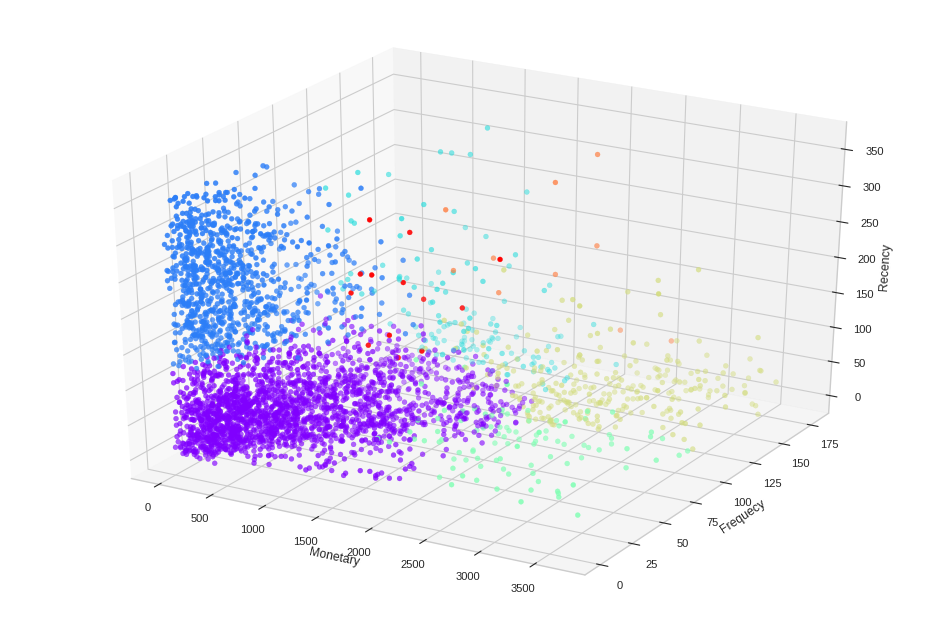

In [60]:
# Mean shift with parameter 0.1
band = estimate_bandwidth(rfm_scaled, quantile=0.1
                         )
analyzer = MeanShift(bandwidth=band)
analyzer.fit_predict(rfm_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Mean Shift")

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#print the labels of each data
print(f"number of estimated clusters: {n_clusters_}")
print(f"bandwidth: {band}")

In [61]:
rfm_cluster = rfm.assign(Cluster=labels)
grouped_meanshift = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_meanshift

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15309.455,683.764,41.796,46.151
1,15358.982,355.846,20.883,237.109
2,15571.748,1067.159,136.806,94.619
3,15170.765,2570.339,55.643,38.714
4,14967.312,2579.971,125.274,45.793
5,15104.400,2027.316,124.200,214.100
6,14790.231,1837.212,27.538,252.769


Mean Shift
number of estimated clusters: 3
bandwidth: 1.236440821877225


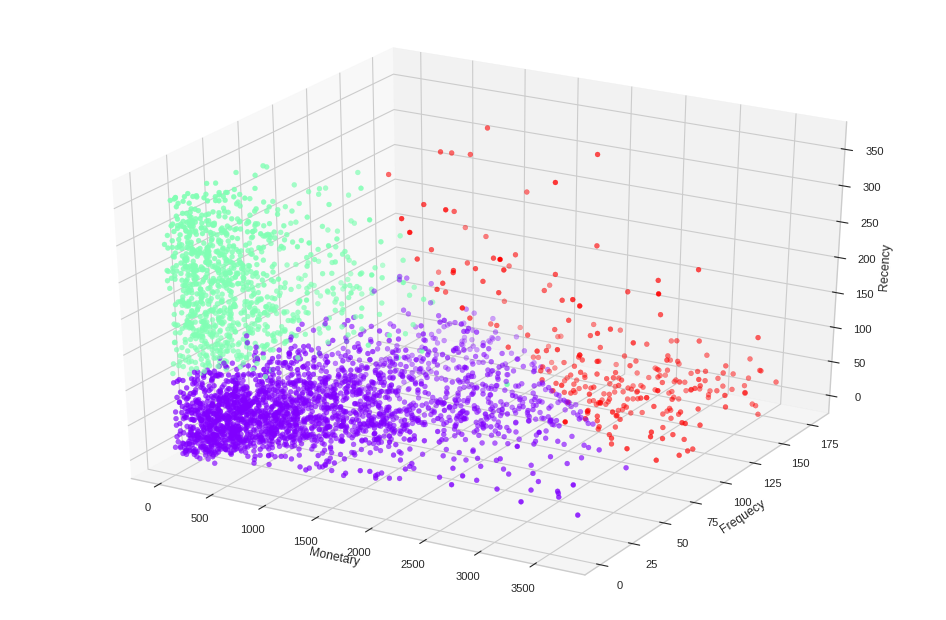

In [62]:
# Mean shift with parameter 0.2
band = estimate_bandwidth(rfm_scaled, quantile=0.2
                         )
analyzer = MeanShift(bandwidth=band)
analyzer.fit_predict(rfm_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Mean Shift")

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#print the labels of each data
print(f"number of estimated clusters: {n_clusters_}")
print(f"bandwidth: {band}")

In [63]:
rfm_cluster = rfm.assign(Cluster=labels)
grouped_meanshift = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_meanshift

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15303.340,809.452,48.226,43.860
1,15357.233,379.822,22.106,231.990
2,15057.758,2543.235,130.145,73.273


CLuster 2 shows that high Total amount spend , higher transactions , and lower last purchase means cluster zero purchased every day </br>

CLuster 1 shows that lower Total amount spend , lower transactions , and higher last purchase means cluster one purchased once in the year </br>

CLuster 0 shows that medium Total amount spend , medium transactions , and medium last purchase means cluster two purchased once in the month </br>





Mean Shift
number of estimated clusters: 1
bandwidth: 1.5489122632141266


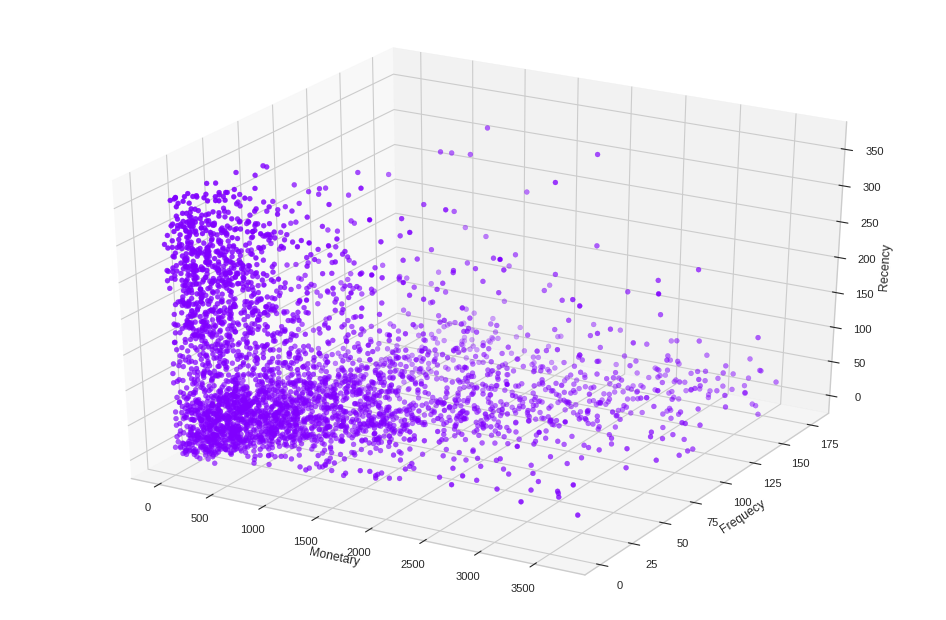

In [64]:
# Mean shift with parameter 0.3
band = estimate_bandwidth(rfm_scaled, quantile=0.3)
analyzer = MeanShift(bandwidth=band)
analyzer.fit_predict(rfm_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Mean Shift")

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#print the labels of each data
print(f"number of estimated clusters: {n_clusters_}")
print(f"bandwidth: {band}")

In [65]:
rfm_cluster = rfm.assign(Cluster=labels)
grouped_meanshift = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_meanshift

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15300.597,815.332,46.907,97.568


This show only 1 cluster with low spending , low transaction,high last purchase history mean shop once in a year

**Hierarchical Agglomerative Clustering**

**With Complete Linkage**

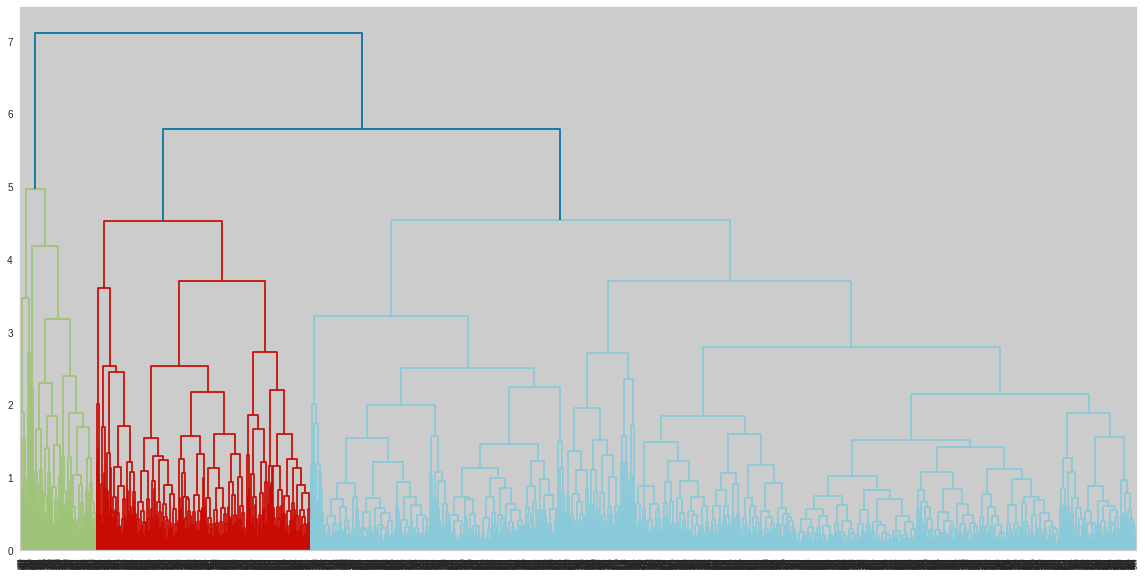

In [66]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='complete'))

Hierarchical Agglomerative Clustering


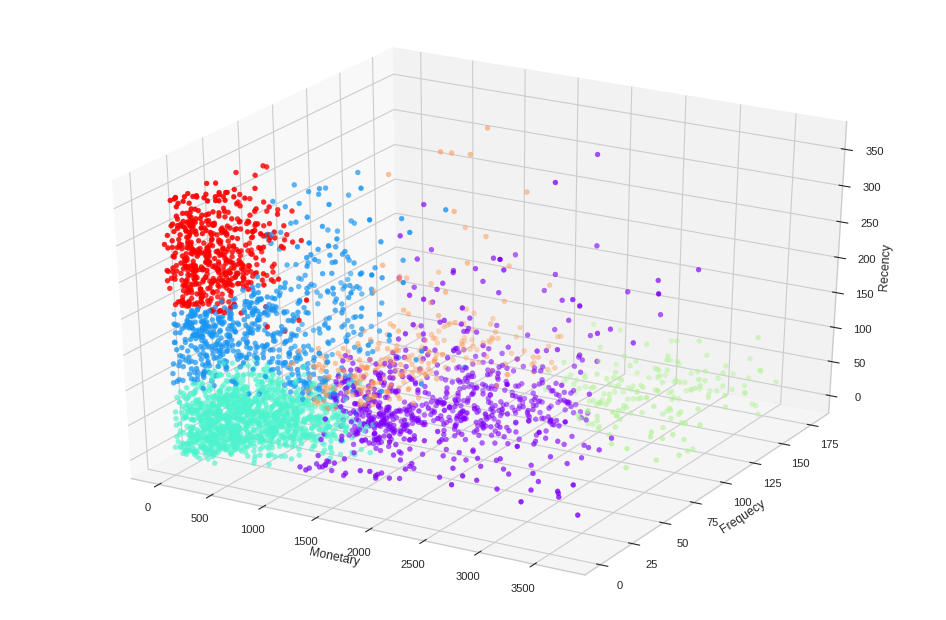

In [67]:

model = AgglomerativeClustering(n_clusters=6)
model.fit(rfm_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [68]:
rfm_cluster = rfm.assign(Cluster=hac_labels)
grouped_aglomerative = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_aglomerative

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15107.151,1648.265,73.535,48.625
1,15279.087,538.714,31.405,163.262
2,15348.915,431.266,25.504,40.925
3,14960.205,2843.051,135.790,31.040
4,15820.057,739.949,117.091,42.833
5,15330.833,282.269,15.290,276.118


CLuster 0 shows that high Total amount spend , higher transactions , and lower last purchase means cluster zero purchased every day </br>

CLuster 1 shows that lower Total amount spend , lower transactions , and higher last purchase means cluster one purchased once in the year </br>

CLuster 2 shows that lower Total amount spend , lower transactions , and medium last purchase means cluster two purchased once in the month </br>





**With Single Linkage**

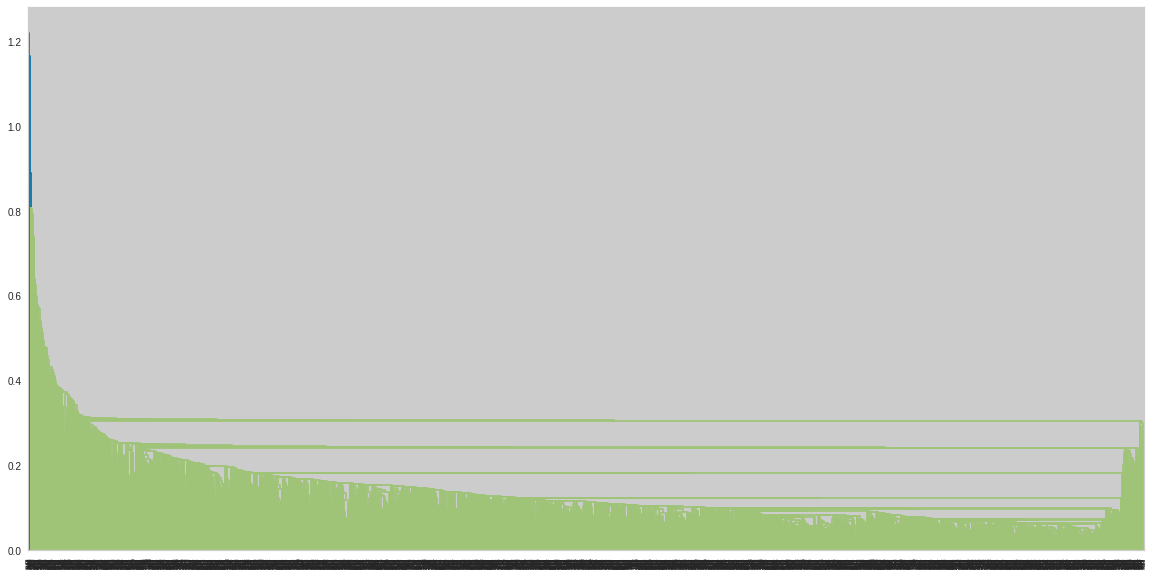

In [69]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='single'))

Hierarchical Agglomerative Clustering


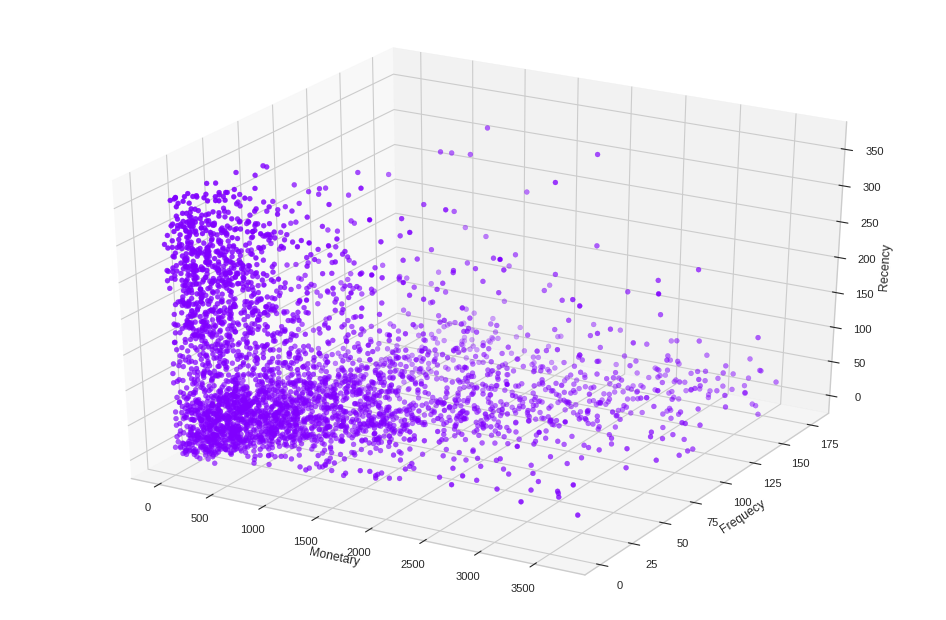

In [70]:

model = AgglomerativeClustering(n_clusters=1)
model.fit(rfm_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [71]:
rfm_cluster = rfm.assign(Cluster=hac_labels)
grouped_aglomerative = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_aglomerative

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15300.597,815.332,46.907,97.568


**With Average linkage**

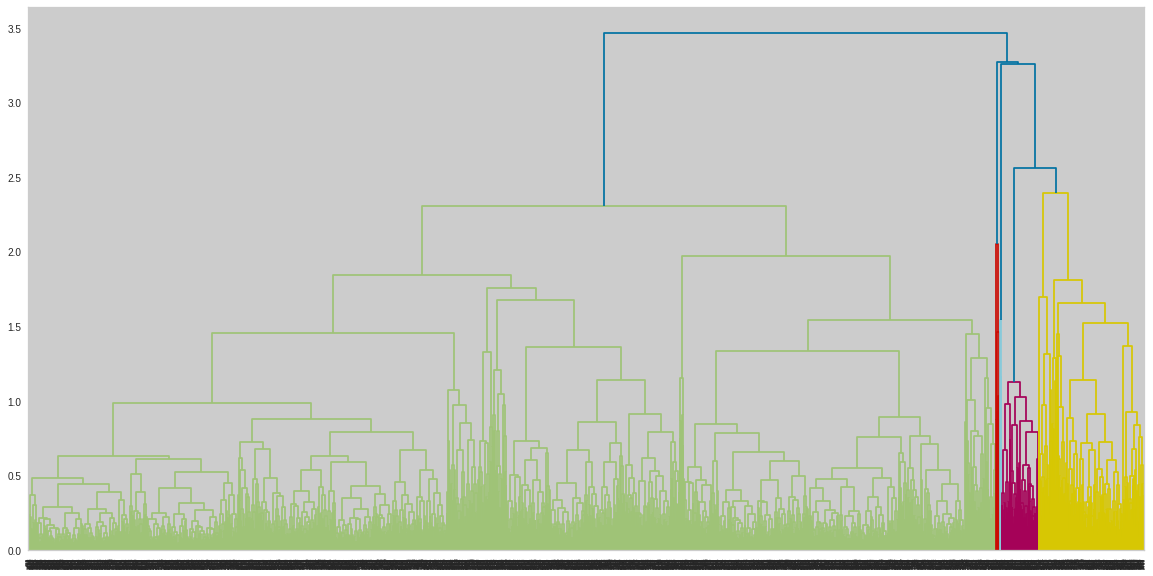

In [72]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='average'))

Hierarchical Agglomerative Clustering


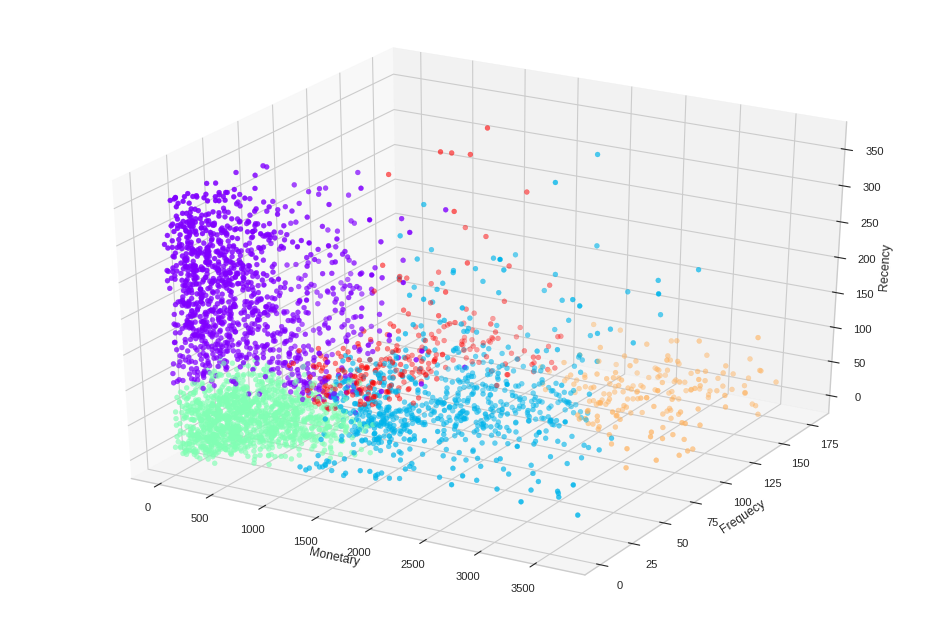

In [73]:

model = AgglomerativeClustering(n_clusters=5)
model.fit(rfm_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [74]:
rfm_cluster = rfm.assign(Cluster=hac_labels)
grouped_aglomerative = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_aglomerative

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15301.936,425.479,24.289,213.094
1,15107.151,1648.265,73.535,48.625
2,15348.915,431.266,25.504,40.925
3,14960.205,2843.051,135.790,31.040
4,15820.057,739.949,117.091,42.833


**With ward linkage**

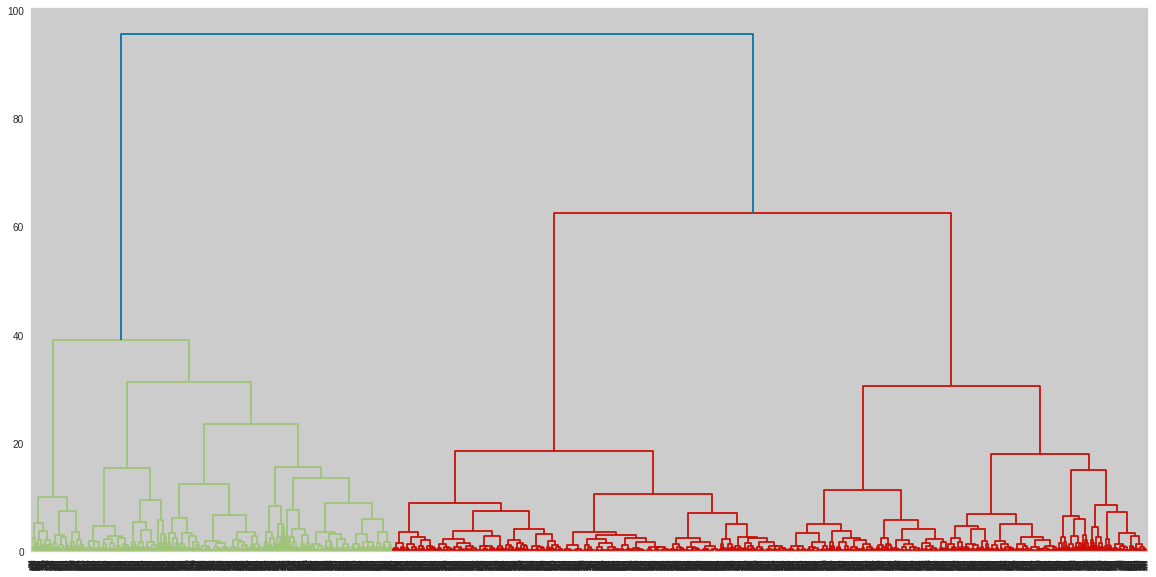

In [75]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))

Hierarchical Agglomerative Clustering


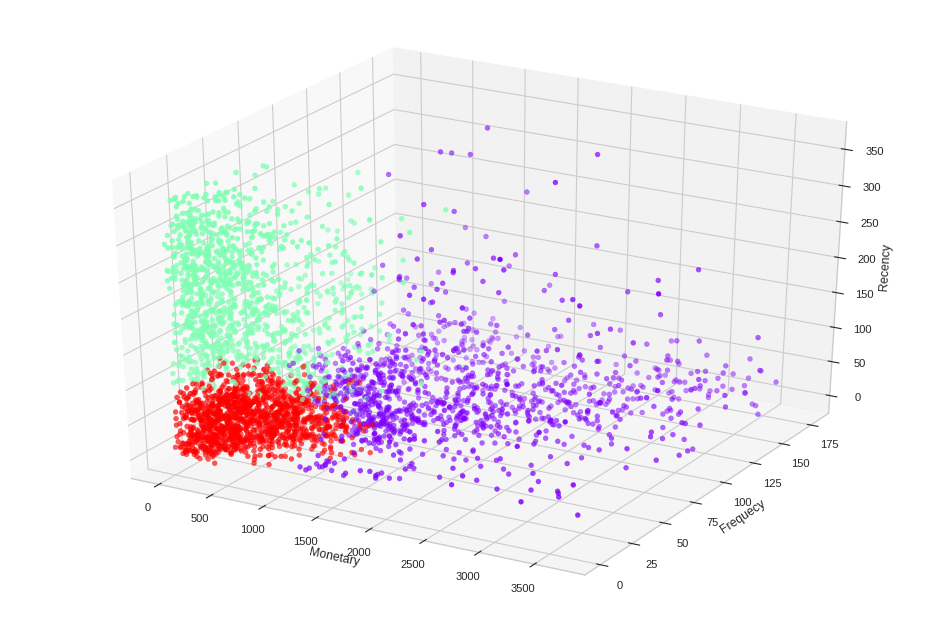

In [76]:

model = AgglomerativeClustering(n_clusters=3)
model.fit(rfm_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [77]:
rfm_cluster = rfm.assign(Cluster=hac_labels)
grouped_aglomerative = rfm_cluster.groupby('Cluster').mean().round(3)
grouped_aglomerative

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15246.369,1623.627,92.839,44.647
1,15301.936,425.479,24.289,213.094
2,15348.915,431.266,25.504,40.925


**Result**<br>

K mean give best result

In [101]:
rfm.index = pd.RangeIndex(len(rfm.index))
RFM_km = pd.concat([rfm, pd.Series(kmean_labels)], axis=1)
RFM_km.columns = ['CustomerID', 'Monetory', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()


,CustomerID,Monetory,Frequency,Recency,ClusterID
0,12348.0,1797.24,31,74,1
1,12349.0,1757.55,73,18,0
2,12350.0,334.40,17,309,2
3,12352.0,2506.04,85,35,0
4,12353.0,89.00,4,203,2


In [0]:
RFM_km.Recency = RFM_km.Recency
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Monetory.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())


In [103]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Monetory", "Frequency", "Recency"]
df

,ClusterID,Monetory,Frequency,Recency
0,0,1889.862905,108.123737,44.848485
1,1,577.409352,33.436402,50.356040
2,2,374.316681,21.610262,239.995633
3,3,NaN,NaN,NaN
4,4,NaN,NaN,NaN


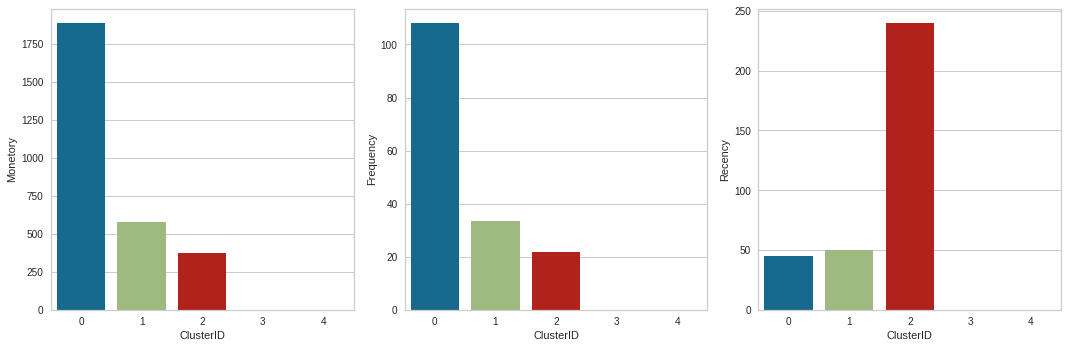

In [105]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Monetory, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.Frequency, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Recency, ax = axs[2])
plt.tight_layout()            
plt.show()